In [40]:
%load_ext autoreload
%autoreload 2

from model import LitModel
from data import LitDataModule
import torch
from torch.utils.data import DataLoader
device = 'cuda' if torch.cuda.is_available() else 'cpu'
import tqdm
import numpy as np

import matplotlib.pyplot as plt

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [41]:
#CHECKPOINT = '/n/home03/creissel/Seismic/runs/test/lightning_logs/73yzmyzc/checkpoints/epoch=47-step=2592.ckpt'
CHECKPOINT = '/n/home03/creissel/Seismic/runs/causal/lightning_logs/o2ukkal7/checkpoints/epoch=17-step=972.ckpt'

In [42]:
model = LitModel.load_from_checkpoint(CHECKPOINT)
model = model.to(device)
model = model.eval()
dataset = LitDataModule.load_from_checkpoint(CHECKPOINT)

In [43]:
pred = []
true = []
with torch.no_grad():
    for inputs, targets in dataset.test_dataloader():
        true.append(targets)
        inputs = inputs.to(device)
        pred.append(model(inputs).detach().cpu().numpy())

In [44]:
pred = np.concatenate(pred).flatten()
true = np.concatenate(true).flatten()

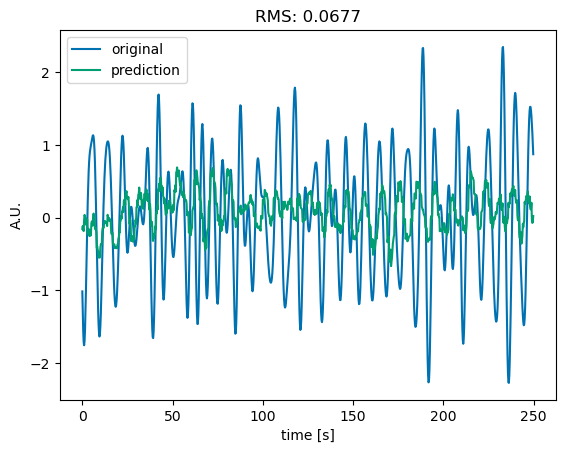

In [45]:
plt.plot(np.arange(0,1000/4.,1/4.), true[:1000], label='original', color='#0072B2')
plt.plot(np.arange(0,1000/4.,1/4.), pred[:1000], label='prediction', color='#009E73')
plt.title('RMS: %.4f' %(np.sqrt(np.mean((pred-true))**2)))
plt.xlabel('time [s]')
plt.ylabel('A.U.')
plt.legend()